# EDA for Jennifer Montgomery

## Setup and Import

In [1]:
import plotly.express as px
fig = px.scatter(x=[1, 2, 3], y=[4, 5, 6], title="Test Plotly Plot")
fig.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import plotly.express as px

In [5]:
import pandas as pd # Import packages
csv_file_path = 'C:\\Users\\fr33c\\OneDrive\\Desktop\\AIPM\\ds-EDA-C-and-R\\data\\eda.csv' # Path to the CSV file
df = pd.read_csv(csv_file_path) # Read the CSV file into a DataFrame
print(df.head()) # Display the first few rows of the DataFrame

         date      price    house_id  bedrooms  sqft_living  view  grade  \
0  2014-09-08   905000.0  1483300570       4.0       3300.0   0.0      7   
1  2014-10-07  1090000.0  2450000295       3.0       2920.0   0.0      8   
2  2015-03-02  1450000.0  4389200955       4.0       2750.0   0.0      8   
3  2015-02-21  1510000.0    46100204       5.0       3300.0   3.0      9   
4  2015-05-13  2050000.0  7424700045       5.0       3830.0   1.0      9   

   yr_renovated  zipcode  waterfront  
0         19910    98040         0.0  
1         20100    98004         0.0  
2         19920    98004         0.0  
3         19910    98040         NaN  
4         19940    98122         0.0  


## Getting to Know the Data

In [10]:
# Examine the usual suspects: head, tail, unique values etc.
# Show the first 5 rows
print(df.head())

# Show the last 5 rows
print(df.tail())

# Show summary info (including datatypes and non-null counts)
print(df.info())

# Show basic statistics for numerical columns
print(df.describe())

# List all column names
print(df.columns)

# Get the number of unique values per column
print(df.nunique())

# Check for missing values per column
print(df.isnull().sum())

         date      price    house_id  bedrooms  sqft_living  view  grade  \
0  2014-09-08   905000.0  1483300570       4.0       3300.0   0.0      7   
1  2014-10-07  1090000.0  2450000295       3.0       2920.0   0.0      8   
2  2015-03-02  1450000.0  4389200955       4.0       2750.0   0.0      8   
3  2015-02-21  1510000.0    46100204       5.0       3300.0   3.0      9   
4  2015-05-13  2050000.0  7424700045       5.0       3830.0   1.0      9   

   yr_renovated  zipcode  waterfront  
0         19910    98040         0.0  
1         20100    98004         0.0  
2         19920    98004         0.0  
3         19910    98040         NaN  
4         19940    98122         0.0  
           date      price    house_id  bedrooms  sqft_living  view  grade  \
195  2014-07-14  1520000.0  2397100705       4.0       3650.0   0.0      9   
196  2014-08-20  2160000.0  5553300375       3.0       3080.0   3.0     11   
197  2014-07-08   950000.0   868000905       3.0       3480.0   0.0      7 

## Visualisations

### 1. Plot

### Waterfront vs Non-Waterfront (Box Plot)

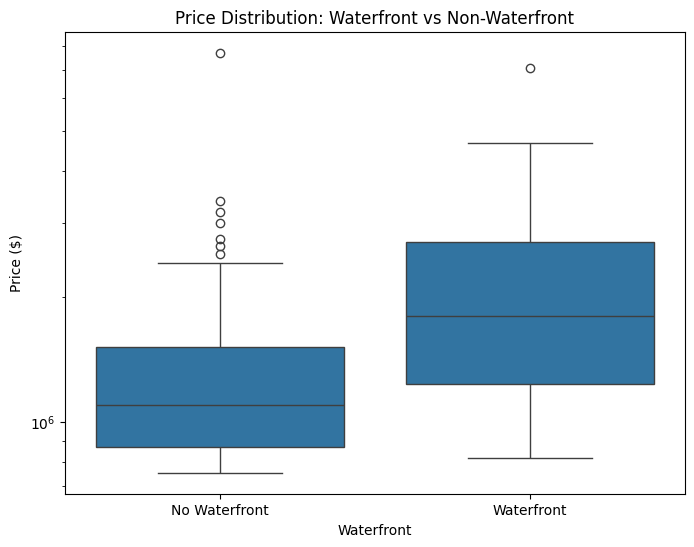

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.xticks([0,1], ['No Waterfront', 'Waterfront'])
plt.title('Price Distribution: Waterfront vs Non-Waterfront')
plt.ylabel('Price ($)')
plt.xlabel('Waterfront')
plt.yscale('log')  # Because prices can vary widely
plt.show()


## Average Price by Zipcode (Bar Plot)

C:\Users\fr33c\AppData\Local\Temp\ipykernel_14864\3815023768.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




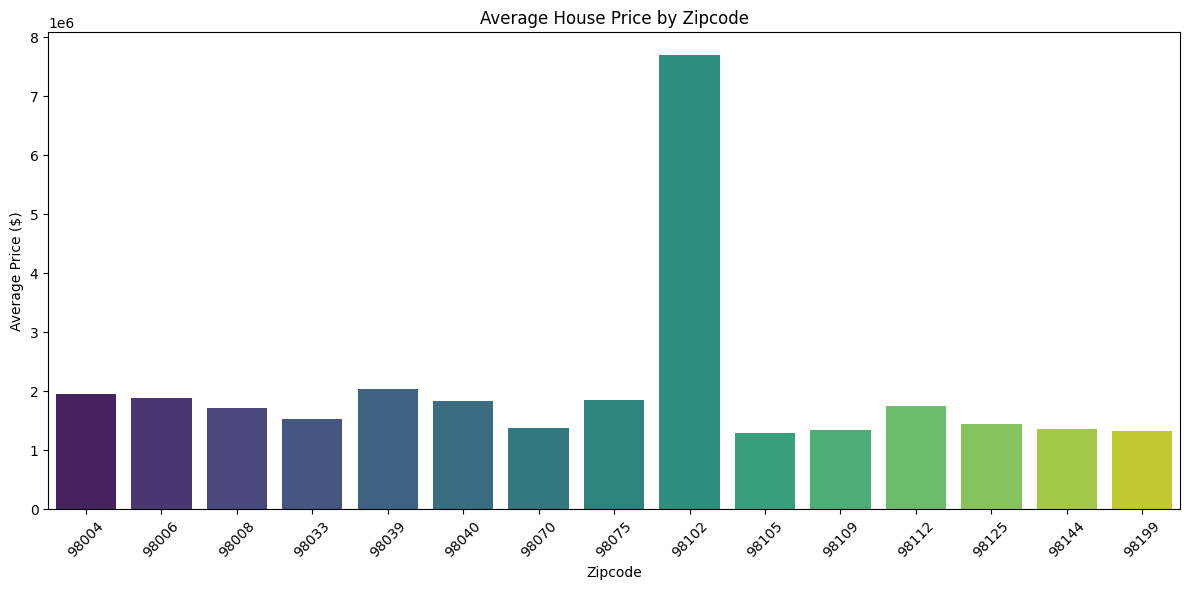

In [12]:
# Group by zipcode
zip_summary = df.groupby('zipcode').agg(
    num_homes=('price', 'count'),
    avg_price=('price', 'mean')
).reset_index().sort_values('avg_price', ascending=False)

# Bar plot (top 15 zip codes)
plt.figure(figsize=(12,6))
sns.barplot(data=zip_summary.head(15), x='zipcode', y='avg_price', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average House Price by Zipcode')
plt.ylabel('Average Price ($)')
plt.xlabel('Zipcode')
plt.tight_layout()
plt.show()


## Scatter Plot for Jennifer’s Criteria

Homes that are:

Waterfront

Renovated

At least 3 bedrooms

3000 sqft

$1,000,000

In [14]:
jennifer_df = df[
    (df['waterfront'] == 1) &
    (df['yr_renovated'] > 0) &
    (df['bedrooms'] >= 3) &
    (df['sqft_living'] > 3000) &
    (df['price'] > 1_000_000)
]

fig = px.scatter(
    jennifer_df,
    x='sqft_living',
    y='price',
    color='zipcode',
    size='grade',
    hover_data=['bedrooms', 'grade', 'yr_renovated'],
    title='High-End Renovated Waterfront Properties'
)
fig.show()


## Grade vs Price (Violin or Box Plot)
Grades represent quality of construction. Higher = better.

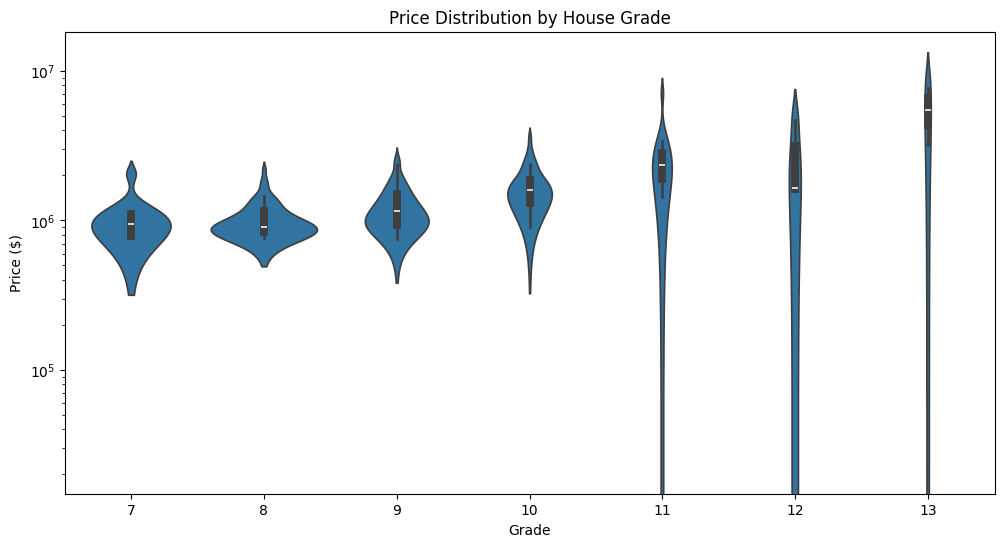

In [15]:
plt.figure(figsize=(12,6))
sns.violinplot(x='grade', y='price', data=df)
plt.title('Price Distribution by House Grade')
plt.ylabel('Price ($)')
plt.xlabel('Grade')
plt.yscale('log')
plt.show()
# Average Price by Zipcode (Bar Plot)

## Jennifer Montgomery Match Table
Properties matching all Jennifer’s criteria.

In [17]:
# Run this after loading the df from the previous query
jennifer_match_table = df[[
    'date',
    'price',
    'zipcode',
    'bedrooms',
    'sqft_living',
    'grade',
    'yr_renovated',
    'view',
    'waterfront'
]].sort_values(by='price', ascending=False)

# Optional: Format prices and date
jennifer_match_table['price'] = jennifer_match_table['price'].map('${:,.0f}'.format)
jennifer_match_table['date'] = pd.to_datetime(jennifer_match_table['date']).dt.date

# Display the top 10 matching properties
jennifer_match_table.head(10)


,date,price,zipcode,bedrooms,sqft_living,grade,yr_renovated,view,waterfront
74,2014-10-13,"$7,700,000",98102,6.0,12050.0,13,19870,3.0,0.0
37,2014-06-11,"$7,060,000",98004,5.0,10040.0,11,20010,2.0,1.0
81,2014-06-17,"$4,670,000",98040,5.0,9640.0,12,20090,4.0,1.0
25,2014-11-18,"$3,600,000",98144,3.0,5020.0,10,20020,4.0,1.0
107,2015-05-08,"$3,400,000",98112,4.0,4260.0,11,20100,0.0,0.0
180,2014-12-30,"$3,300,000",98008,3.0,4220.0,11,19870,4.0,1.0
79,2014-09-23,"$3,200,000",98199,6.0,7100.0,13,20020,0.0,0.0
26,2015-02-02,"$3,000,000",98004,5.0,5370.0,10,20080,0.0,0.0
137,2014-05-29,"$2,750,000",98039,4.0,4430.0,10,20070,0.0,0.0
70,2014-06-24,"$2,700,000",98040,5.0,3831.0,9,19800,4.0,1.0


##  Heatmap: Correlation Between Features
Purpose: Understand how variables (like grade, sqft, bedrooms) relate to price.

Text(0.5, 1.0, 'Correlation Heatmap')

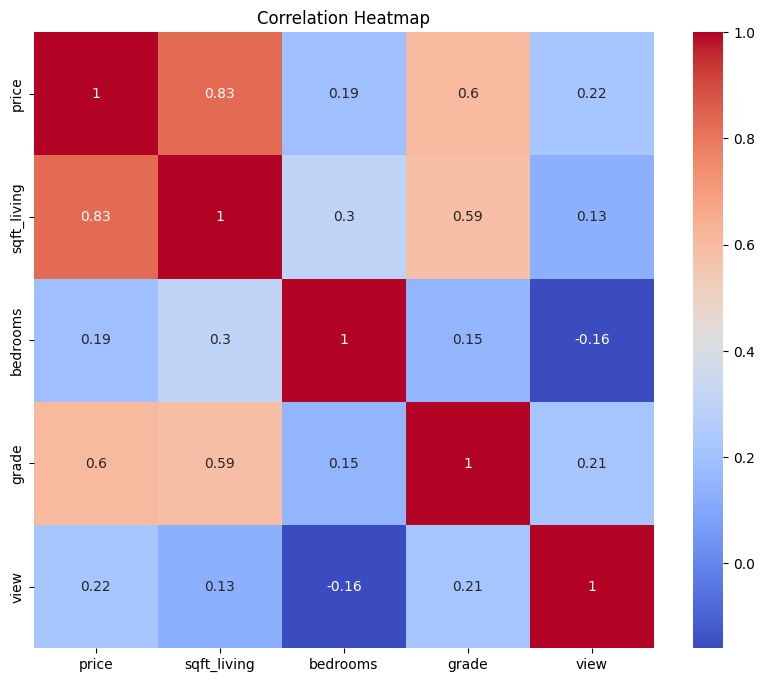

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['price', 'sqft_living', 'bedrooms', 'grade', 'view']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
